## Fetch Bitcoin Data

In [1]:
# import libraries
import math
import pandas_ta as ta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from datetime import datetime as dt
from binance import Client
import csv

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Verifica si el archivo existe y elimínalo
import os
archivo_excel = "BTCUSDT.csv"
if os.path.exists(archivo_excel):
    os.remove(archivo_excel)


In [2]:
# create client object from binance library
client = Client(None, None)

In [3]:
# defining the function that fetch the historical data of the wanted coin
def getdata(symbol, period, start, end):
    """
    This function gives us the historical candle data of the desired coin
    :param symbol: coin name that you want to get data
    :param period: time period of candles
    :param start: starting date of candles data
    :param end: end date of candles data
    :return: candles data
    """
    candles = client.get_historical_klines(symbol, period, start, end)
    return candles

In [4]:
# defining the function that make csv file of the historical data of the wanted coin
def make_csv(symbol, candles):
    """
    This function makes csv file of desired coin with defined properties
    :param symbol: coin name that you want to make csv file
    :param candles: historical data of the desired coin
    :return: historical data in csv file
    """
    csvfile = open(symbol + ".csv", "a", newline="")
    cursor = csv.writer(csvfile)
    for i in candles:
        cursor.writerow(i)
    csvfile.close()

In [5]:
# defining the function that make csv files of the historical data of the wanted multiple coin
def multiple_csv(symbols, interval, start, end):
    """
    This function makes csv file for each coin in symbols parameter with defined properties
    :param symbols: list of multiple coin names that you want to make csv file
    :param interval: time period of candles (default: client.KLINE_INTERVAL_1DAY you can change the interval)
    :param start: starting date of candles data
    :param end: end date of candles data
    :return: historical data of multiple coin in csv files
    """
    for i in symbols:
        make_csv(i, getdata(i, interval, str(start), str(end)))
        print(i, "csv file is ready.")

In [6]:
# defining function the that turn the timestamp to the date 
def calculate_time(timestamp):
    """
    This function turns the timestamp to the date
    :param timestamp: given timestamp
    :return: date according to given timestamp
    """
    return dt.fromtimestamp(timestamp/1000)

In [7]:
# get Bitcoin historical data and make csv
multiple_csv(["BTCUSDT"], client.KLINE_INTERVAL_1HOUR, "1 January 2010", "31 January 2025")

BTCUSDT csv file is ready.


In [8]:
# read Bitcoin histroical data as dataframe with column names
headers = ["Open Time", "Open", "High", "Low", "Close", "Volume", "Close Time", "QAV", "NAT", "TBBAV", "TBQAV", "Ignore"]
data = pd.read_csv("BTCUSDT.csv", names=headers)
data.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,NAT,TBBAV,TBQAV,Ignore
0,1502942400000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,202366.138393,171,35.160503,150952.477943,0
1,1502946000000,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,100304.823567,102,21.448071,92608.279728,0
2,1502949600000,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,31282.312670,36,4.802861,20795.317224,0
3,1502953200000,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,19241.058300,25,2.602292,11291.347015,0
4,1502956800000,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4239.503586,28,0.814655,3552.746817,0


In [9]:
# Turn "Open Time" and "Close Time" columns to Date
open_date = []
for i in data["Open Time"]:
    open_date.append(calculate_time(i))
data["Open Time"] = open_date

close_date = []
for i in data["Close Time"]:
    close_date.append(calculate_time(i))
data["Close Time"] = close_date
data

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,NAT,TBBAV,TBQAV,Ignore
0,2017-08-16 23:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-16 23:59:59.999,2.023661e+05,171,35.160503,1.509525e+05,0
1,2017-08-17 00:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 00:59:59.999,1.003048e+05,102,21.448071,9.260828e+04,0
2,2017-08-17 01:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 01:59:59.999,3.128231e+04,36,4.802861,2.079532e+04,0
3,2017-08-17 02:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 02:59:59.999,1.924106e+04,25,2.602292,1.129135e+04,0
4,2017-08-17 03:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 03:59:59.999,4.239504e+03,28,0.814655,3.552747e+03,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65240,2025-01-30 15:00:00,105711.28,105821.62,104815.82,104907.15,1118.427530,2025-01-30 15:59:59.999,1.178239e+08,267107,592.746900,6.244692e+07,0
65241,2025-01-30 16:00:00,104907.10,105217.17,104805.15,105048.89,488.853350,2025-01-30 16:59:59.999,5.134625e+07,134442,258.134440,2.711341e+07,0
65242,2025-01-30 17:00:00,105048.89,105351.29,104962.11,105094.56,279.525670,2025-01-30 17:59:59.999,2.938796e+07,62704,163.034310,1.714230e+07,0
65243,2025-01-30 18:00:00,105094.57,105254.00,104693.82,104722.94,395.499620,2025-01-30 18:59:59.999,4.152436e+07,75973,157.022000,1.649169e+07,0


## Visualize the Bitcoin Data

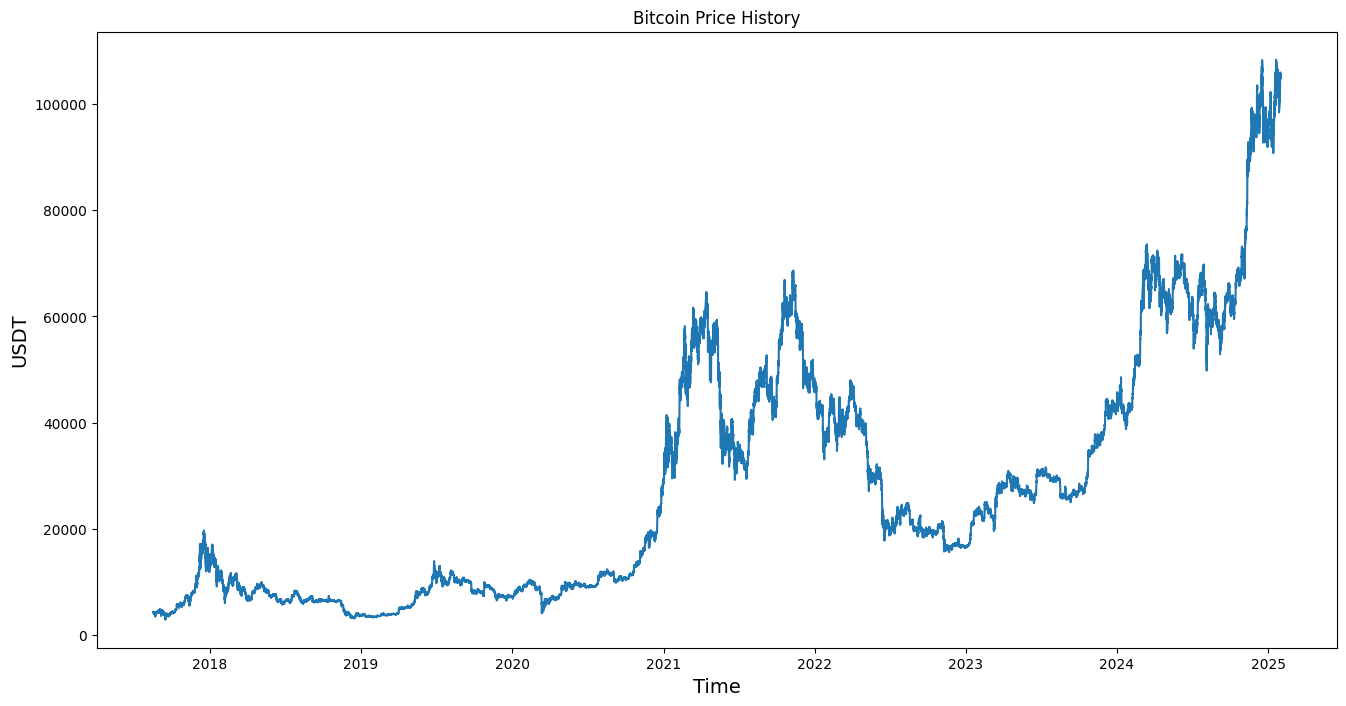

In [10]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.title("Bitcoin Price History")
plt.plot(data["Close Time"], data["Close"])
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

## Create Train and Test Data

In [11]:
# Create new data with only the "Close" column
close = data.filter(["Close"])
# Convert the dataframe to a np array
close_array = close.values
# See the train data len
train_close_len = math.ceil(len(close_array) * 0.8)
train_close_len

52196

In [12]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_array)
scaled_data

array([[0.01318612],
       [0.01324769],
       [0.01333336],
       ...,
       [0.9693983 ],
       [0.96587253],
       [0.96753807]])

In [13]:
# Create the training dataset
train_data = scaled_data[0 : train_close_len, :]
# Create X_train and y_train
X_train = []
y_train = []
for i in range(1, len(train_data)):
    X_train.append(train_data[i - 1 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 1:
        print(X_train)
        print(y_train)

[array([0.01318612])]
[np.float64(0.013247690890248583)]


In [14]:
#  make X_train and y_train np array
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(52195, 1, 1)

In [16]:
# create the testing dataset
test_data = scaled_data[train_close_len - 1 : , :]
# create X_test and y_test
X_test = []
y_test = data.iloc[train_close_len : , :]
for i in range(1, len(test_data)):
    X_test.append(test_data[i - 1 : i, 0])

In [17]:
# convert the test data to a np array and reshape the test data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
print(X_test.shape)
print(y_test.shape)

(13049, 1, 1)
(13049, 12)


## Modelos clasicos


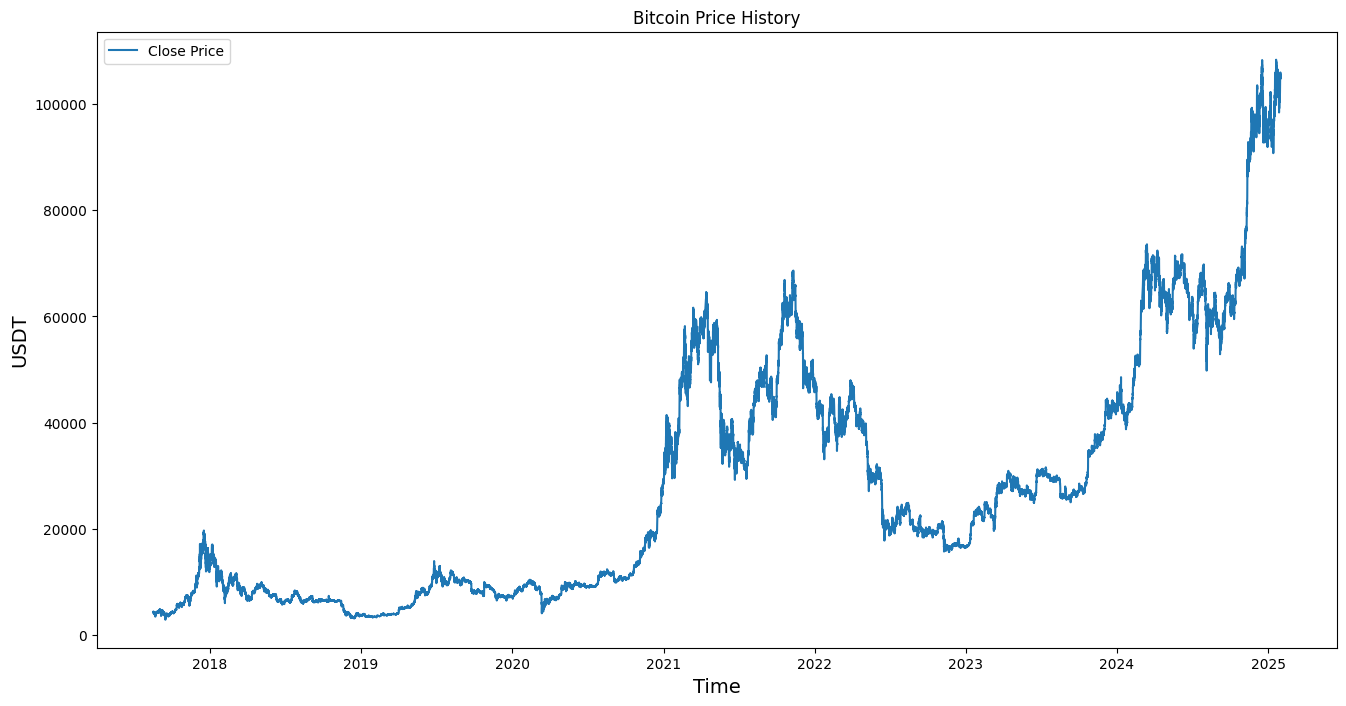

Shapes:
X_train: (52028, 168) y_train: (52028,)
X_test: (13049, 168) y_test: (13049,)

Modelo: KNN
Tiempo de Entrenamiento: 0.01 seg
Tiempo de Predicción:   1.23 seg
MSE:  0.014662
MAE:  0.060109
RMSE: 0.121089

Modelo: LinearRegression
Tiempo de Entrenamiento: 0.22 seg
Tiempo de Predicción:   0.00 seg
MSE:  0.000011
MAE:  0.002002
RMSE: 0.003320

Modelo: RandomForest
Tiempo de Entrenamiento: 74.45 seg
Tiempo de Predicción:   0.03 seg
MSE:  0.012530
MAE:  0.046683
RMSE: 0.111939

Modelo: SVR
Tiempo de Entrenamiento: 0.08 seg
Tiempo de Predicción:   0.01 seg
MSE:  0.055408
MAE:  0.133690
RMSE: 0.235389

Resumen de resultados:
              Modelo       MSE       MAE      RMSE
0               KNN  0.014662  0.060109  0.121089
1  LinearRegression  0.000011  0.002002  0.003320
2      RandomForest  0.012530  0.046683  0.111939
3               SVR  0.055408  0.133690  0.235389


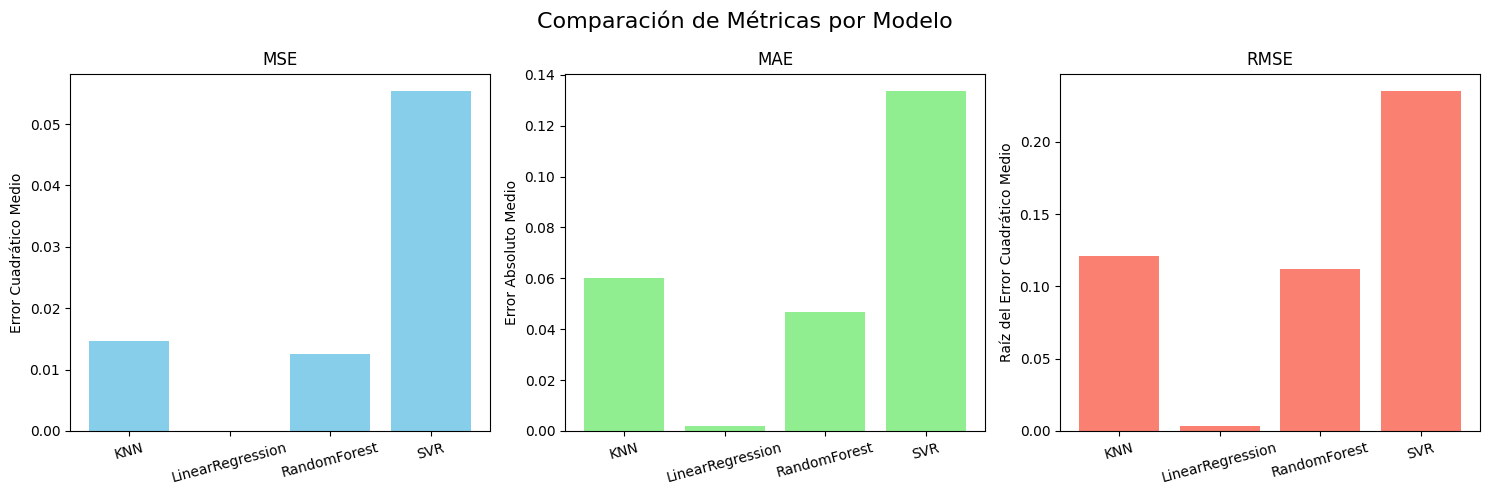

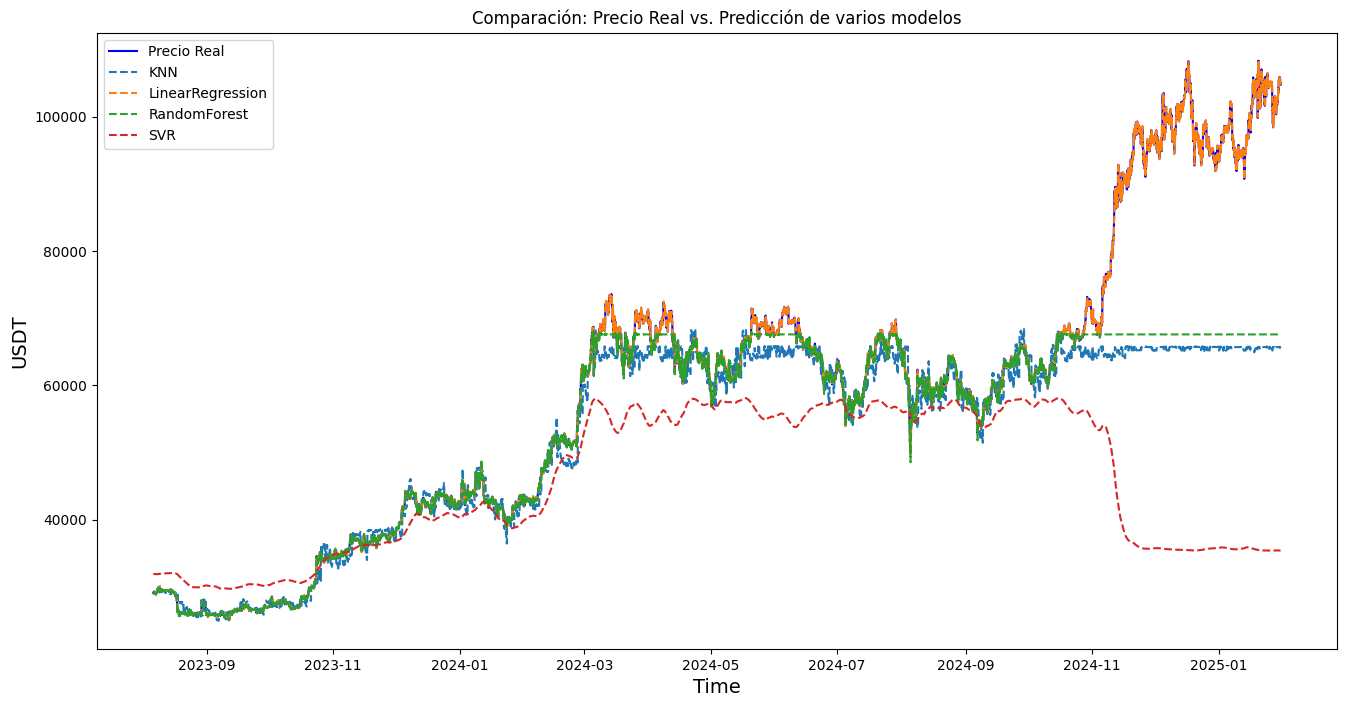

In [19]:
# Importar librerías necesarias
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Función para convertir timestamp a datetime
from datetime import datetime as dt
def calculate_time(timestamp):
    return dt.fromtimestamp(timestamp/1000)

# Leer el archivo CSV (asegúrate de tener el archivo "BTCUSDT.csv" ya generado)
# Se asume que el archivo tiene columnas: "Open Time", "Open", "High", "Low", "Close", "Volume", "Close Time", etc.
headers = ["Open Time", "Open", "High", "Low", "Close", "Volume", "Close Time", "QAV", "NAT", "TBBAV", "TBQAV", "Ignore"]
data = pd.read_csv("BTCUSDT.csv", names=headers)

# Convertir las columnas de tiempo a datetime para visualización (no se usarán como features)
data["Open Time"] = data["Open Time"].apply(calculate_time)
data["Close Time"] = data["Close Time"].apply(calculate_time)

# Visualizar la serie de precios (opcional)
plt.figure(figsize=(16,8))
plt.title("Bitcoin Price History")
plt.plot(data["Close Time"], data["Close"], label="Close Price")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.legend()
plt.show()

# =============================================================================
# CREACIÓN DEL CONJUNTO DE DATOS PARA MODELOS CLÁSICOS
# =============================================================================

# Tomamos solo la columna "Close" para la predicción (datos numéricos)
close = data.filter(["Close"])

# Convertir la columna a array
close_array = close.values

# Determinar la longitud del conjunto de entrenamiento (80% de los datos)
train_close_len = math.ceil(len(close_array) * 0.8)

# Normalizar los datos (MinMaxScaler)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_array)

# Crear el dataset de entrenamiento
train_data = scaled_data[0:train_close_len, :]

# Crear X_train y y_train usando una ventana de 60 pasos
X_train = []
y_train = []
window_size = 24*7
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

# Crear el conjunto de test
# Para el test, tomamos desde (train_close_len - window_size) hasta el final para poder crear las ventanas
test_data = scaled_data[train_close_len - window_size:, :]
X_test = []
for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
X_test = np.array(X_test)

# y_test se extrae de los datos originales (sin la ventana, correspondiendo a la parte no usada en training)
y_test = scaled_data[train_close_len:, 0]  # vector normalizado

# Para modelos clásicos trabajaremos con arrays 2D: [num_samples, window_size]
# En este caso, X_train y X_test ya tienen la forma adecuada (e.g., (num_samples, 60))

print("Shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

# =============================================================================
# ENTRENAMIENTO Y EVALUACIÓN DE MODELOS CLÁSICOS
# =============================================================================

def evaluate_model(name, model, X_tr, y_tr, X_te, y_te):
    t0 = time.time()
    model.fit(X_tr, y_tr)
    fit_time = time.time() - t0

    t1 = time.time()
    y_pred = model.predict(X_te)
    pred_time = time.time() - t1

    mse = mean_squared_error(y_te, y_pred)
    mae = mean_absolute_error(y_te, y_pred)
    rmse = np.sqrt(mse)

    print(f"\nModelo: {name}")
    print(f"Tiempo de Entrenamiento: {fit_time:.2f} seg")
    print(f"Tiempo de Predicción:   {pred_time:.2f} seg")
    print(f"MSE:  {mse:.6f}")
    print(f"MAE:  {mae:.6f}")
    print(f"RMSE: {rmse:.6f}")
    return y_pred, mse, mae, rmse

# Instanciar modelos con parámetros simples (sin gridsearch para acelerar)
# KNeighborsRegressor: se usa n_jobs=8 para paralelización
knn = KNeighborsRegressor(n_neighbors=5, n_jobs=8)
linreg = LinearRegression()
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=8)
svr = SVR(kernel='rbf', C=1.0)

pred_knn, mse_knn, mae_knn, rmse_knn = evaluate_model("KNN", knn, X_train, y_train, X_test, y_test)
pred_lin, mse_lin, mae_lin, rmse_lin = evaluate_model("LinearRegression", linreg, X_train, y_train, X_test, y_test)
pred_rf,  mse_rf,  mae_rf,  rmse_rf  = evaluate_model("RandomForest", rf, X_train, y_train, X_test, y_test)
pred_svr, mse_svr, mae_svr, rmse_svr = evaluate_model("SVR", svr, X_train, y_train, X_test, y_test)

# =============================================================================
# Resumen de resultados en un DataFrame
# =============================================================================

results = pd.DataFrame({
    "Modelo": ["KNN", "LinearRegression", "RandomForest", "SVR"],
    "MSE":  [mse_knn, mse_lin, mse_rf, mse_svr],
    "MAE":  [mae_knn, mae_lin, mae_rf, mae_svr],
    "RMSE": [rmse_knn, rmse_lin, rmse_rf, rmse_svr]
})
print("\nResumen de resultados:\n", results)

# =============================================================================
# 1. Visualizar las métricas en subplots
# =============================================================================
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# MSE
axs[0].bar(results['Modelo'], results['MSE'], color='skyblue')
axs[0].set_title('MSE')
axs[0].set_ylabel('Error Cuadrático Medio')
axs[0].set_xticklabels(results['Modelo'], rotation=15)

# MAE
axs[1].bar(results['Modelo'], results['MAE'], color='lightgreen')
axs[1].set_title('MAE')
axs[1].set_ylabel('Error Absoluto Medio')
axs[1].set_xticklabels(results['Modelo'], rotation=15)

# RMSE
axs[2].bar(results['Modelo'], results['RMSE'], color='salmon')
axs[2].set_title('RMSE')
axs[2].set_ylabel('Raíz del Error Cuadrático Medio')
axs[2].set_xticklabels(results['Modelo'], rotation=15)

plt.suptitle("Comparación de Métricas por Modelo", fontsize=16)
plt.tight_layout()
plt.show()

# =============================================================================
# 2. Desescalar predicciones y y_test para visualizarlas en USDT
# =============================================================================
pred_knn_descaled = scaler.inverse_transform(pred_knn.reshape(-1, 1))
pred_lin_descaled = scaler.inverse_transform(pred_lin.reshape(-1, 1))
pred_rf_descaled  = scaler.inverse_transform(pred_rf.reshape(-1, 1))
pred_svr_descaled = scaler.inverse_transform(pred_svr.reshape(-1, 1))
y_test_descaled   = scaler.inverse_transform(y_test.reshape(-1, 1))

# =============================================================================
# 3. Graficar el precio real vs. TODAS las predicciones
# =============================================================================

# Fechas del test (a partir de train_close_len)
dates_test = data["Close Time"].iloc[train_close_len:].reset_index(drop=True)

plt.figure(figsize=(16, 8))
plt.title("Comparación: Precio Real vs. Predicción de varios modelos")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)

# Precio real
plt.plot(dates_test, y_test_descaled, label="Precio Real", color="blue")

# KNN
plt.plot(dates_test, pred_knn_descaled, label="KNN", linestyle="--")

# Regresión Lineal
plt.plot(dates_test, pred_lin_descaled, label="LinearRegression", linestyle="--")

# Random Forest
plt.plot(dates_test, pred_rf_descaled, label="RandomForest", linestyle="--")

# SVR
plt.plot(dates_test, pred_svr_descaled, label="SVR", linestyle="--")

plt.legend(loc="best")
plt.show()


In [20]:
print(X_train.shape)

(52028, 168)


In [21]:
print(X_test.shape)
print(X_test[0])

(13049, 168)
[0.25022075 0.25008299 0.25008603 0.25042455 0.25051952 0.25017701
 0.25116277 0.25076012 0.25105091 0.25120746 0.25082293 0.24936459
 0.2500162  0.24947455 0.24892551 0.25011231 0.25182434 0.25173374
 0.25185271 0.25144911 0.25127843 0.25105091 0.25134702 0.2509901
 0.25115793 0.2510883  0.25114418 0.25129731 0.25192833 0.25089883
 0.25031496 0.24979818 0.2496514  0.24949467 0.24930254 0.24893955
 0.24942142 0.24975387 0.24943774 0.24964894 0.25013954 0.24934808
 0.24681187 0.24588    0.24617411 0.24668673 0.24663227 0.24685058
 0.24739715 0.24676585 0.24676244 0.24613796 0.24629337 0.24620276
 0.24581529 0.24700902 0.24683824 0.24700911 0.25002607 0.25004893
 0.24962512 0.24976857 0.2498552  0.25414358 0.25524452 0.25546131
 0.25513854 0.2534507  0.25385449 0.25361228 0.25282917 0.25292224
 0.25209009 0.25174825 0.25248781 0.25278211 0.25186675 0.25135471
 0.25005586 0.25049475 0.24769127 0.24884961 0.24885056 0.24888338
 0.24874961 0.24914904 0.24921014 0.24921023 0.249

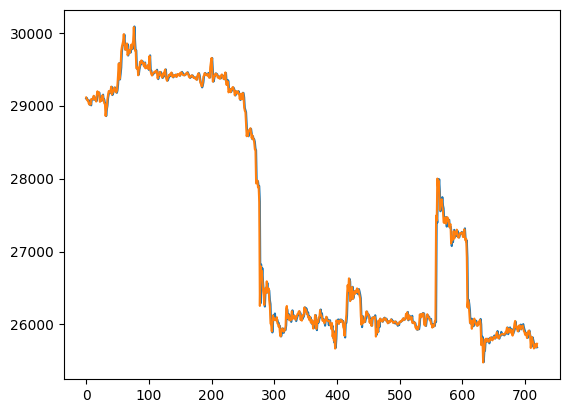

In [22]:
ypred1 = pred_lin_descaled[0:720]
x0= np.arange(0,720,1)
yval1 = close[train_close_len:train_close_len+720]
plt.Figure()
plt.plot(x0,ypred1,label='Predicted')
plt.plot(x0,yval1,label='Validation')
plt.show()

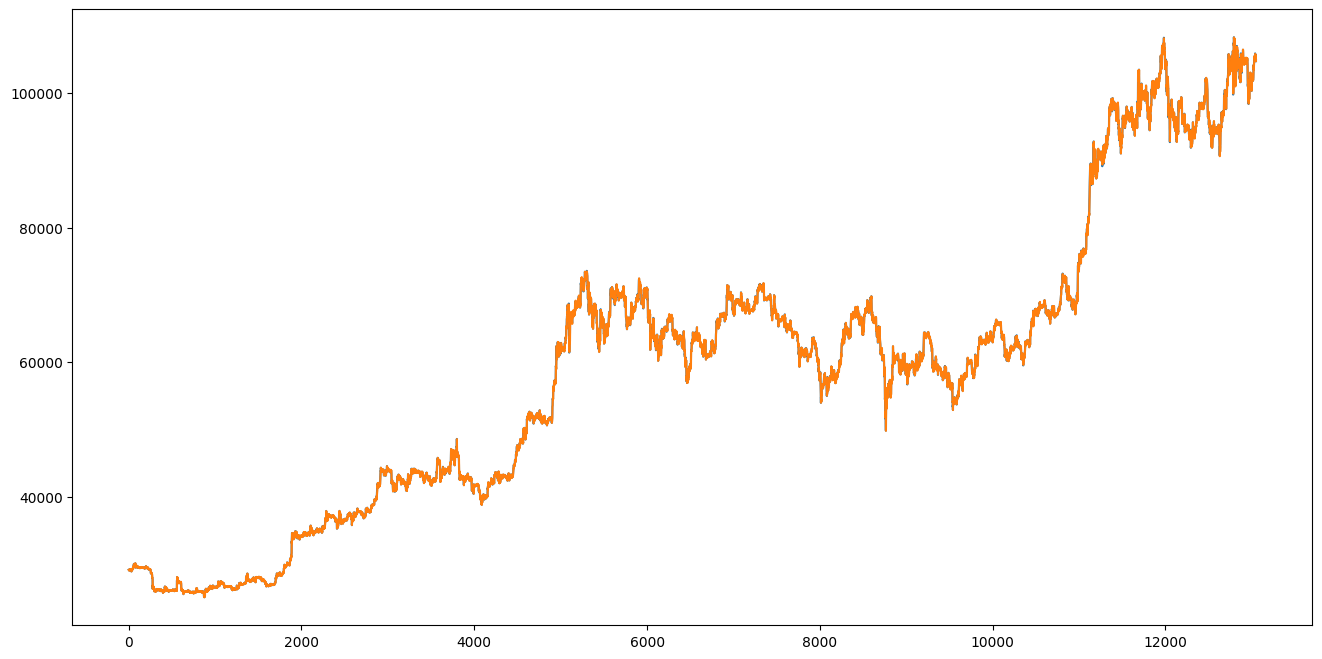

In [23]:
plt.figure(figsize=(16, 8))
plt.plot(y_test_descaled)
plt.plot(pred_lin_descaled)

In [24]:
print(mean_squared_error(y_test_descaled, pred_lin_descaled))

122439.39945135519


In [25]:
print(y_train.shape)
print(X_train.shape)

(52028,)
(52028, 168)


In [26]:
#print the final values of the linear regression model as of the form and weights
print('Model: Linear Regression')
print('Slope:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('R^2 score:', linreg.score(X_train, y_train))


Model: Linear Regression
Slope: [ 6.61242757e-03  4.41914946e-03 -6.72347534e-03 -6.90418713e-03
 -2.04322001e-02  2.48550081e-02  1.08890539e-03  9.76500964e-03
 -6.71811255e-03 -9.56944522e-03 -6.63961740e-03  6.36398030e-03
 -8.11590626e-03  8.99767556e-03  4.32301848e-03 -3.94952752e-03
  8.11126731e-03  6.24777596e-04  2.77588154e-03 -2.68112271e-03
 -1.19708965e-02  5.60478919e-03  3.86912925e-03 -1.17316758e-02
  3.71321869e-03 -1.51790448e-03 -1.15126682e-02  6.15023227e-03
 -2.42208184e-03  4.07349382e-03  5.79736748e-03 -2.54315729e-03
 -1.52752402e-03  1.49914326e-02 -2.23377078e-03 -1.71026292e-03
 -1.80722107e-03 -1.10430200e-03  8.34351388e-03  6.10415411e-03
 -1.16656546e-02 -6.08797698e-03  1.84729353e-02 -1.53181293e-02
 -2.14895788e-03  3.98234759e-03  1.77411301e-03 -2.61452904e-02
  1.25540664e-02  1.01287721e-02 -8.52011474e-03 -4.00454822e-03
  2.54675783e-02 -1.54242468e-02  7.11940936e-04  3.65914209e-03
 -1.18724075e-03 -2.32987947e-02  3.13110919e-02 -4.778904

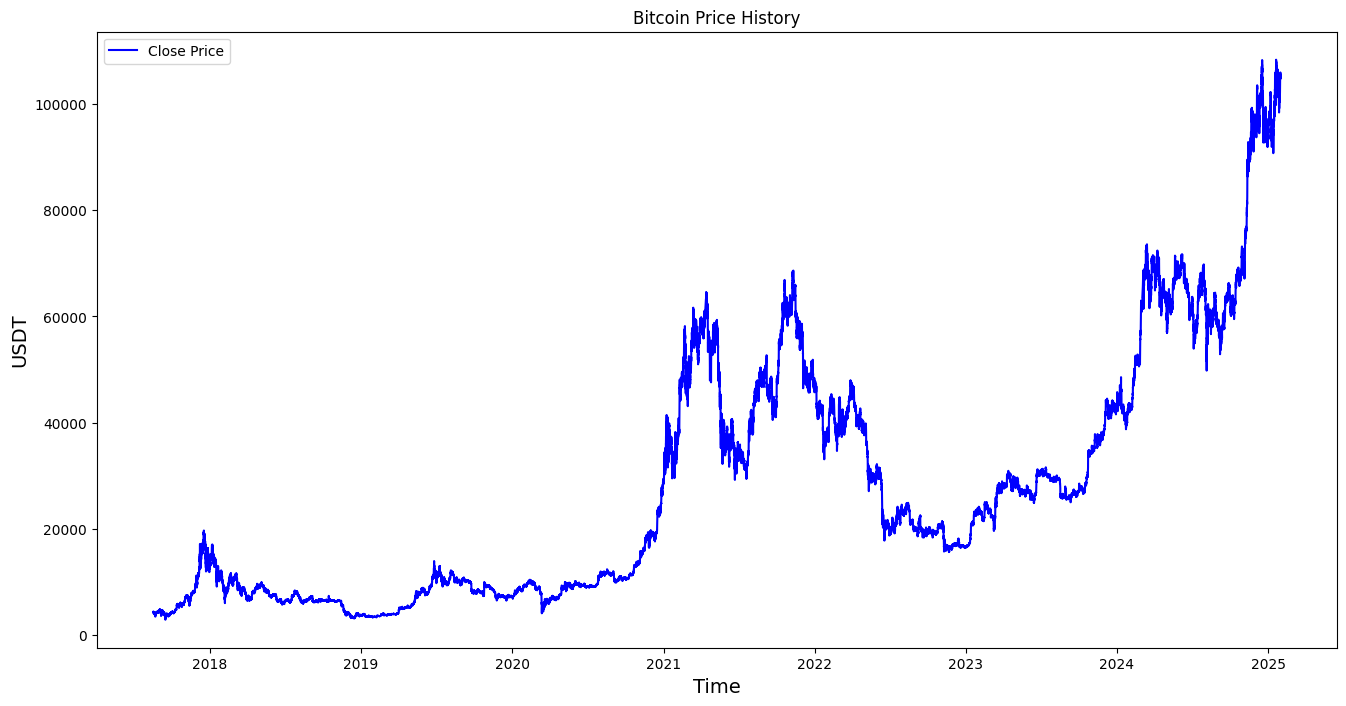

Shapes:
X_train: (52136, 60) y_train: (52136,)
X_test: (13049, 60) y_test: (13049,)

Número de muestras de entrenamiento: 52136
Número de muestras de test: 13049

Rango del conjunto escalado: min = 0.0 max = 1.0


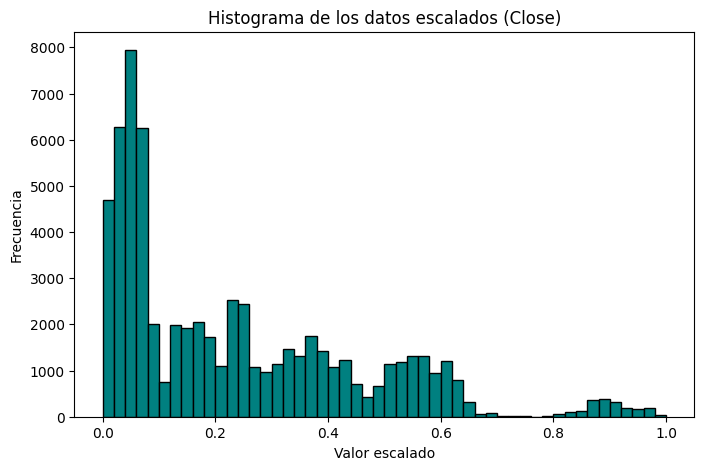


MSE promedio en validación cruzada (Regresión Lineal): 4.246832238755983e-06


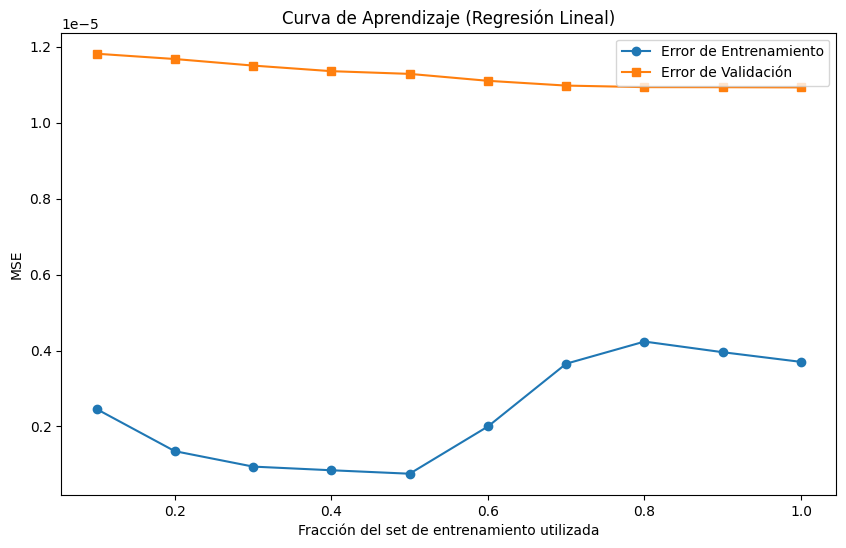

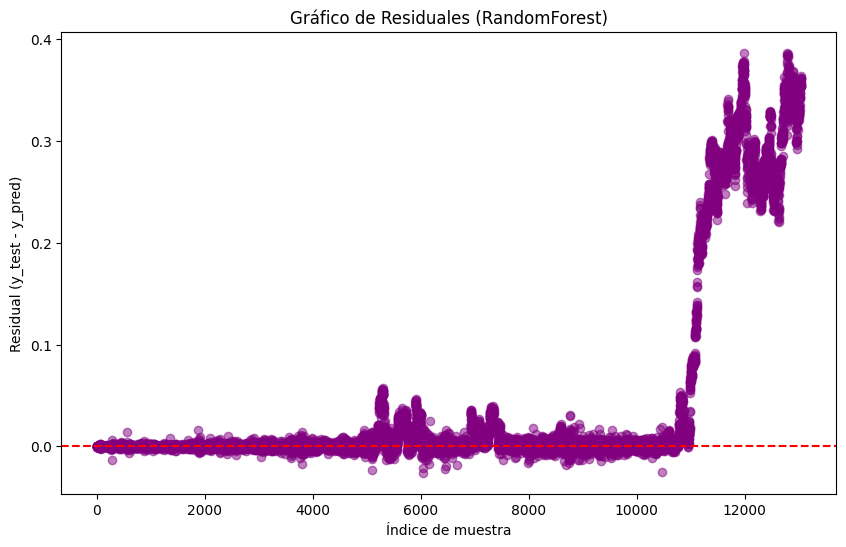

In [27]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# -----------------------------
# 1. Lectura y Preprocesamiento
# -----------------------------

# Define las cabeceras (asegúrate de que coincidan con el archivo CSV)
headers = ["Open Time", "Open", "High", "Low", "Close", "Volume",
           "Close Time", "QAV", "NAT", "TBBAV", "TBQAV", "Ignore"]

# Lee el archivo CSV
data = pd.read_csv("BTCUSDT.csv", names=headers)

# Convierte "Open Time" y "Close Time" a datetime para visualización
def calculate_time(timestamp):
    return dt.fromtimestamp(timestamp/1000)

data["Open Time"] = data["Open Time"].apply(calculate_time)
data["Close Time"] = data["Close Time"].apply(calculate_time)

# Visualización opcional de la serie temporal de Close
plt.figure(figsize=(16,8))
plt.title("Bitcoin Price History")
plt.plot(data["Close Time"], data["Close"], label="Close Price", color="blue")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.legend()
plt.show()

# -----------------------------
# 2. Creación del Conjunto de Datos para Modelos Clásicos
# -----------------------------
# Usamos únicamente la columna "Close"
close = data.filter(["Close"])
close_array = close.values

# Definir el tamaño de entrenamiento (80%)
train_close_len = math.ceil(len(close_array) * 0.8)

# Normalizar los datos
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_array)

# Crear el dataset de entrenamiento (datos normalizados)
train_data = scaled_data[0:train_close_len, :]

# Generar X_train y y_train usando una ventana de 60 pasos
window_size = 60
X_train = []
y_train = []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

# Generar el conjunto de test:
# Se toma desde train_close_len - window_size para formar ventanas completas
test_data = scaled_data[train_close_len - window_size:, :]
X_test = []
for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
X_test = np.array(X_test)
y_test = scaled_data[train_close_len:, 0]  # vector normalizado

print("Shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

# -----------------------------
# 3. Verificar la División y Normalización
# -----------------------------
print("\nNúmero de muestras de entrenamiento:", X_train.shape[0])
print("Número de muestras de test:", X_test.shape[0])

# Verificar la normalización: El rango de los datos escalados debe estar en [0,1]
print("\nRango del conjunto escalado: min =", scaled_data.min(), "max =", scaled_data.max())
plt.figure(figsize=(8,5))
plt.hist(scaled_data, bins=50, color='teal', edgecolor='black')
plt.title("Histograma de los datos escalados (Close)")
plt.xlabel("Valor escalado")
plt.ylabel("Frecuencia")
plt.show()

# -----------------------------
# 4. Validación Cruzada con TimeSeriesSplit (Ejemplo con Regresión Lineal)
# -----------------------------
tscv = TimeSeriesSplit(n_splits=5)
linreg = LinearRegression()
cv_scores = cross_val_score(linreg, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print("\nMSE promedio en validación cruzada (Regresión Lineal):", cv_mse)

# -----------------------------
# 5. Curva de Aprendizaje
# -----------------------------
train_sizes = np.linspace(0.1, 1.0, 10)
train_errors = []
val_errors = []

for frac in train_sizes:
    split_index = int(frac * X_train.shape[0])
    X_tr_subset = X_train[:split_index]
    y_tr_subset = y_train[:split_index]
    
    linreg.fit(X_tr_subset, y_tr_subset)
    train_pred = linreg.predict(X_tr_subset)
    train_error = mean_squared_error(y_tr_subset, train_pred)
    train_errors.append(train_error)
    
    # Evaluamos en el conjunto de test completo
    val_pred = linreg.predict(X_test)
    val_error = mean_squared_error(y_test, val_pred)
    val_errors.append(val_error)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_errors, marker='o', label="Error de Entrenamiento")
plt.plot(train_sizes, val_errors, marker='s', label="Error de Validación")
plt.xlabel("Fracción del set de entrenamiento utilizada")
plt.ylabel("MSE")
plt.title("Curva de Aprendizaje (Regresión Lineal)")
plt.legend()
plt.show()

# -----------------------------
# 6. Análisis de Residuales (Ejemplo con RandomForest)
# -----------------------------
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=8)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
residuals = y_test - rf_pred

plt.figure(figsize=(10,6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Índice de muestra")
plt.ylabel("Residual (y_test - y_pred)")
plt.title("Gráfico de Residuales (RandomForest)")
plt.show()
